<b>2025-01-03</b>

<b>Teoretiska Frågor</b>
1. Beskriv kort hur en relationsdatabas fungerar.

    En relationsdatabas organiserar data i "tables" som består av rader och kolumner. Primary keys och foreign keys (likt python dictionaries key-value) används för att hänvisa till olika tables.

2. Vad menas med “CRUD”-flödet?

    "CRUD"-flödet står för de operationer som man kan göra i sin data:
    Create, Read, Update och Delete

3. Beskriv kort vad en “left join” och en “inner join” är. Varför använder man det?

    Left join används för att retunera alla rader i ett table samt matchande rader i ett annat table. Man kan se det som alla element i A i ett klassiskt venn-diagram.
    Inner join blir A snitt B, alltså retuneras alla rader som matchar både i första (left) och andra (right) tabellen.
    
4. Beskriv kort vad indexering i SQL innebär.

    Indexering skapar en ytterligare datastruktur som hänvisar till specifika rader och kolumner. Genom att organisera data för snabbare sökning gör indexering queries mer effektiva och snabba.
    
5. Beskriv kort vad en vy i SQL är.

    Resultatet från en query. Påverkar ej underliggande data.

6. Beskriv kort vad en lagrad procedur i SQL är.

    Sparade queries som kan köras vid behov. Kan användas till att t.ex automatisera uppgifter eller återanvända upprepande eftersökta queries.
    

<b>--- Programmeringsuppgift --- </b>

Connect to database

In [19]:
import pyodbc

# Define connection parameters
server = 'localhost'  # or the server name you used in VS Code
database = 'AdventureWorks2022'
driver = '{ODBC Driver 17 for SQL Server}'  # Make sure this driver is installed

# Create the connection string with Windows Authentication
connection_string = f"""
    DRIVER={driver};
    SERVER={server};
    DATABASE={database};
    Trusted_Connection=yes;
"""

try:
    # Establish connection
    conn = pyodbc.connect(connection_string)
    print("Connection successful!")
except Exception as e:
    print("Error connecting to database:", e)


Connection successful!


Function for fetching data from database

In [20]:
import pandas as pd

def run_query(query):
    server = 'localhost'
    database = 'AdventureWorks2022'
    driver = '{ODBC Driver 17 for SQL Server}'

    connection_string = f"""
        DRIVER={driver};
        SERVER={server};
        DATABASE={database};
        Trusted_Connection=yes;
    """
    
    try:
        with pyodbc.connect(connection_string) as conn:  
            df = pd.read_sql(query, conn)
            return df  # Return DataFrame for further processing/display

    except Exception as e:
        print("Error executing query:", e)
        return None

<b>1. Descriptive summary of database:</b>

By looking at table schemas we get an idea of what the database contains. It contains tables with the schemas HumanResources, Person, Production, Purchasing, Sales and dbo.
This allows us to draw the conclusion that AdventureWorks produces and sells some type of item.

Looking closer at the ProductDescription table we find that AdventureWorks sells bicycles. As we are only takeing a glance at the avalible product descriptions we don't really know if they sell other products as well, however it is clear that they sell bicycles.

In [133]:
query_tables = """
SELECT DISTINCT TABLE_SCHEMA 
FROM INFORMATION_SCHEMA.TABLES 
WHERE TABLE_TYPE = 'BASE TABLE';
"""
df_tables = run_query(query_tables)
if df_tables is not None:
    display(df_tables)

query_product_description = """
SELECT TOP 15 Description
FROM Production.ProductDescription;
"""

df_product_description = run_query(query_product_description)
if df_product_description is not None:
    display(df_product_description)

C:\Users\Isaac\AppData\Local\Temp\ipykernel_8788\2716349532.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,TABLE_SCHEMA
0,dbo
1,HumanResources
2,Person
3,Production
4,Purchasing
5,Sales


C:\Users\Isaac\AppData\Local\Temp\ipykernel_8788\2716349532.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Description
0,Chromoly steel.
1,Aluminum alloy cups; large diameter spindle.
2,Aluminum alloy cups and a hollow axle.
3,"Suitable for any type of riding, on or off-roa..."
4,This bike delivers a high-level of performance...
5,For true trail addicts. An extremely durable ...
6,Serious back-country riding. Perfect for all l...
7,Top-of-the-line competition mountain bike. Per...
8,Suitable for any type of off-road trip. Fits a...
9,Entry level adult bike; offers a comfortable r...


<b>2. Statistical analysis </b>

Looking at the Sales table_names I decided to investigate Sales.SaleReason. It contains sales data from the period of 2011-05-31 to 2014-06-30.


Each sale order has a category of reason attached to it, as demonstrated below.

C:\Users\Isaac\AppData\Local\Temp\ipykernel_14008\2716349532.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Name,SalesCount
0,Price,17473
1,On Promotion,3515
2,Manufacturer,1746
3,Quality,1551
4,Other,1395
5,Review,1245
6,Television Advertisement,722


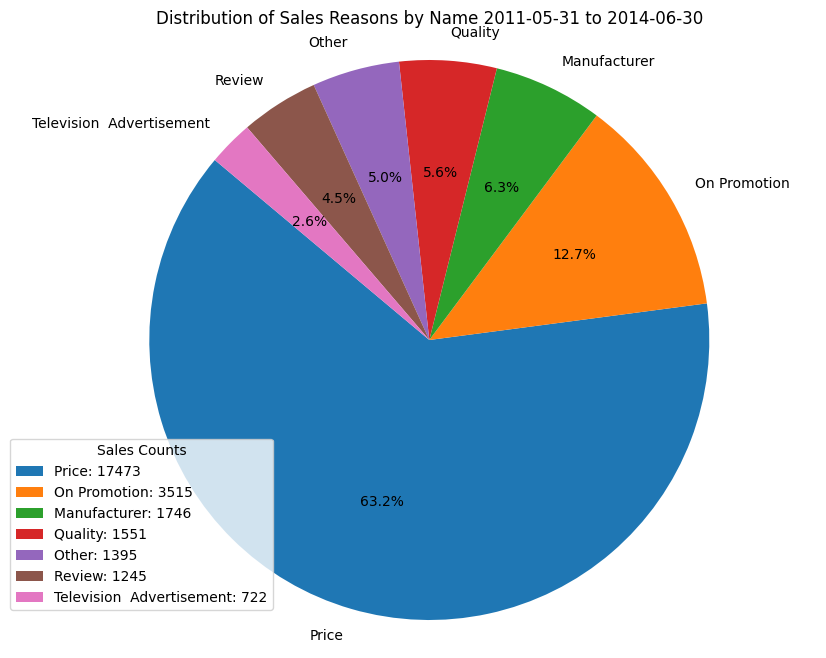

In [24]:
import matplotlib.pyplot as plt

query_sales_reasons = """
SELECT sr.Name, COUNT(so.SalesReasonID) AS SalesCount
FROM Sales.SalesOrderHeaderSalesReason so
JOIN Sales.SalesReason sr ON so.SalesReasonID = sr.SalesReasonID
GROUP BY sr.Name
ORDER BY SalesCount DESC;
"""

df_sales_reasons = run_query(query_sales_reasons)
if df_sales_reasons is not None:
    display(df_sales_reasons)

    plt.figure(figsize=(10, 8))
    
    def func(pct):
        return f'{pct:.1f}%'

    wedges, texts, autotexts = plt.pie(
        df_sales_reasons['SalesCount'], 
        labels=df_sales_reasons['Name'], 
        autopct=func,
        startangle=140
    )
    
    plt.title('Distribution of Sales Reasons by Name 2011-05-31 to 2014-06-30')
    plt.axis('equal')

    sales_counts = df_sales_reasons['SalesCount'].tolist()
    reason_names = df_sales_reasons['Name'].tolist()
    total_sales = sum(sales_counts)
    legend_labels = [f'{name}: {count}' for name, count in zip(reason_names, sales_counts)]
    plt.legend(legend_labels, title="Sales Counts", loc='lower left', bbox_to_anchor=(-0.05, 0.05))

    plt.show()

To check the statistical significance of this data I will put it in a 95% confidence interval. From the results below, I deem the sample of sales to be big enough to be statistically significant at a 95% confidence level.

In [251]:
import numpy as np

total_sales = 27647
z_score = 1.96  # 95% confidence
sales_reasons = {
    'Price': 0.632,
    'On Promotion': 0.127,
    'Manufacturer': 0.063,
    'Quality': 0.056,
    'Other': 0.05,
    'Review': 0.045,
    'Television Advertisement': 0.026
}

def calc_confidence_interval(name, p, n, z):
    se = np.sqrt((p * (1 - p)) / n)
    margin_of_error = z * se

    ci_lower = p - margin_of_error
    ci_upper = p + margin_of_error

    return ci_lower, ci_upper

results = []
for reason, proportion in sales_reasons.items():
    ci_lower, ci_upper = calc_confidence_interval(reason, proportion, total_sales, z_score)
    results.append({
        'Sales Reason': reason,
        'Proportion': proportion,
        'CI Lower': ci_lower.round(3),
        'CI Upper': ci_upper.round(3)
    })

df_results = pd.DataFrame(results)
print(df_results)

               Sales Reason  Proportion  CI Lower  CI Upper
0                     Price       0.632     0.626     0.638
1              On Promotion       0.127     0.123     0.131
2              Manufacturer       0.063     0.060     0.066
3                   Quality       0.056     0.053     0.059
4                     Other       0.050     0.047     0.053
5                    Review       0.045     0.043     0.047
6  Television Advertisement       0.026     0.024     0.028


<b>3. Conclusions and recommendations</b>

It is clear that Adventure Works prices are very competetive with their competitors based on the fact that 63,2% of customers base their purchase reason on the price of the products. 

More over marketing strategies, such advertisements and promotions, account for 21,6% of customers purchasing reasons with promotions in a majority of 12,7%. This seems very resonable seeing as a overwhelming amount of customers state the nice prices of the products to be their main purchasing reason. It is clear that Adventure Works customers place great weight in the price of the product they wish to buy. Going forward, Adventure Works should take this into account if any discussions are held on increasing the profit margin on product prices.

As for the rest of the marketing strategies, namely advertisements, perhaps an assessment should be made comparing costs of advertisements and the resulting increased sales. However, there is no indication in the data I am reviewing in this assignement that advertisements are inefficient or are resulting in a netloss.

<b>Executive summary</b>

- Competitive pricing: Adventure Works prices are highly competitive, with 63.2% of customers claiming price as their primary purchasing reason.
  
- Marketing effectiveness: Marketing strategies, including promotions, account for 21.6% of purchasing reasons, with 12.7% specifically attributed to promotions. This indicates that marketing efforts are effective but perhaps could be optimized further.

- Future research: Discuss external factors such as competitor prices that may affect customer purchasing behavior. This could provide a better understanding of the pricing of products.

By focusing on these areas, Adventure Works can enhance its competitive edge and better meet customer needs.

<b> Självvärdering </b>
1. Utmaningar du haft under arbetet samt hur du hanterat dem.

    Jag var helt ny till SQL i början av kursen men kom snabbt in i tänket då jag använt CRUD-databaser tidigare. Lite pilligt att få igång localhost SQL men blev gick bra med hjälp av ChatGPT. Jag var inte helt bekväm med Jupyter Notebook heller och känner fortfarande att jag saknar lite "standarder" gällande hur man ska strukturea markdowns och kod i analyser som denna. Även sjukt irriterande att GIT "smutsas" ned med ändringar så fort man gör något, men är nog en vanesak att lära sig ignorera det som ändras i filerna men inte är faktisk kod / markdown.
2. Vilket betyg du anser att du skall ha och varför.

    Osäker men tror G. Man hade kunnat göra en mycket större analys av datan från Adventure works.
3. Tips du hade gett till dig själv i början av kursen nu när du slutfört den.

    Lek runder mer med stora databaser för "learn by doing" är väldigt effektivt vilket jag märkte med Adventure Works databasen.

<b>TEMP CODES</b>

In [236]:
query_test = """
SELECT TABLE_SCHEMA, TABLE_NAME
FROM INFORMATION_SCHEMA.TABLES 
WHERE TABLE_TYPE = 'BASE TABLE';
"""

df_test = run_query(query_test)
if df_test is not None:
    display(df_test)

C:\Users\Isaac\AppData\Local\Temp\ipykernel_8788\2716349532.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,TABLE_SCHEMA,TABLE_NAME
0,Sales,SalesTaxRate
1,Sales,PersonCreditCard
2,Person,PersonPhone
3,Sales,SalesTerritory
4,Person,PhoneNumberType
5,Production,Product
6,Sales,SalesTerritoryHistory
7,Production,ScrapReason
8,HumanResources,Shift
9,Production,ProductCategory


In [17]:
query_test2 = """
SELECT TABLE_NAME, TABLE_SCHEMA
FROM INFORMATION_SCHEMA.TABLES 
WHERE TABLE_TYPE = 'BASE TABLE' AND TABLE_SCHEMA = 'Sales';
"""

df_test2 = run_query(query_test2)
if df_test2 is not None:
    display(df_test2)

query_test2 = """
SELECT ModifiedDate
FROM Sales.SalesOrderDetail
"""

df_test2 = run_query(query_test2)
if df_test2 is not None:
    display(df_test2)

C:\Users\Isaac\AppData\Local\Temp\ipykernel_14008\2716349532.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,TABLE_NAME,TABLE_SCHEMA
0,SalesTaxRate,Sales
1,PersonCreditCard,Sales
2,SalesTerritory,Sales
3,SalesTerritoryHistory,Sales
4,ShoppingCartItem,Sales
5,SpecialOffer,Sales
6,SpecialOfferProduct,Sales
7,Store,Sales
8,CountryRegionCurrency,Sales
9,CreditCard,Sales


C:\Users\Isaac\AppData\Local\Temp\ipykernel_14008\2716349532.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,ModifiedDate
0,2011-05-31
1,2011-05-31
2,2011-05-31
3,2011-05-31
4,2011-05-31
...,...
121312,2014-06-30
121313,2014-06-30
121314,2014-06-30
121315,2014-06-30
